# Case study 3: Decreasing mortality risk with age in *Homarus gammarus*

In [1]:
import sys

import numpy as np

sys.path.insert(0, '../') # The following modules are in the directory above
import figures
from cohort_model import (
    population_survivorship_difference,
    HYP_WILD_TYPE,
    MUTANT_WILD
)
from fitness import get_fitness_data, homarus_fertility

## Predicted lifetime reproductive success and intrinsic rate of increase for females with indeterminate growth and negative senescence not restraining and restraining somatic maintenance (Figure 5 in paper)

In [2]:
# Figure 5 parameters
individual_count = 1000
repetition_count = 1000 # TODO: riktig?

t_m = 100 # TODO: riktig?

epsilons = np.array([0.01, 0.02, 0.03, 0.04])

# TODO: Dokumenter hvor parameterne under kommer fra 
alpha = 0.000222 # TODO: riktig?
kappa = 0.033 # TODO: riktig?
hazard_rates_wt = np.array(0.077).repeat(4)

beta =  0.8
sigma = 1.0
gamma = 4.0
mu = 50.0

frequency = 4 # Birth terms every nth time step

In [3]:
%%time
hazard_rate_parameters = dict(alpha=alpha, kappa=kappa, beta=beta, t_m=t_m)
population_simulations, mean_diff, std_diff = population_survivorship_difference(
    individual_count=individual_count,
    repetition_count=repetition_count,
    epsilons=epsilons,
    hazard_rates_wt=hazard_rates_wt,
    t_m=t_m,
    populations=(MUTANT_WILD, HYP_WILD_TYPE),
    hazard_rate_parameters=hazard_rate_parameters
)

CPU times: user 2min, sys: 1min 36s, total: 3min 36s
Wall time: 3min 41s


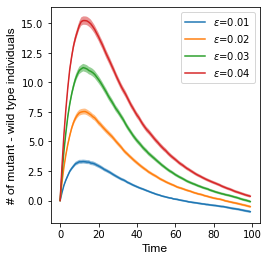

In [4]:
# Figure not in paper, but the simulation data are needed for figure 5
figures.plot_fig_2(t_m, mean_diff, std_diff, repetition_count)

In [5]:
fertility_wt = homarus_fertility(t_m, sigma, gamma, frequency, HYP_WILD_TYPE)
fertility_wt = list(zip(range(t_m), fertility_wt))

fertility_mut = homarus_fertility(t_m, sigma, gamma, frequency, MUTANT_WILD, mu=mu, alpha=alpha, kappa=kappa)
fertility_mut = list(zip(range(t_m), fertility_mut))

In [6]:
fitness_stats_wt = get_fitness_data(population_simulations[HYP_WILD_TYPE], fertility_wt)
fitness_stats_mut = get_fitness_data(population_simulations[MUTANT_WILD], fertility_mut)

Increase in R0 from hypothetical wild type to mutant: 2.87%
Increase in r from hypothetical wild type to mutant: 1.75%


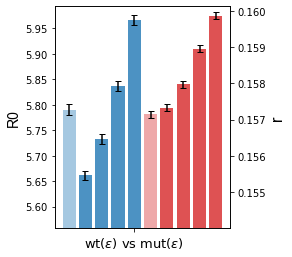

In [7]:
figures.plot_fig_5(fitness_stats_wt, fitness_stats_mut)

r0_wt_mean = fitness_stats_wt['r0_mean']
r_wt_mean = fitness_stats_wt['r_mean']
r0_mut_mean = fitness_stats_mut['r0_mean']
r_mut_mean = fitness_stats_mut['r_mean']

print(f"Increase in R0 from hypothetical wild type to mutant: {(r0_mut_mean[3] - r0_wt_mean[3]) / r0_wt_mean[3] * 100:.2f}%")
print(f"Increase in r from hypothetical wild type to mutant: {(r_mut_mean[3] - np.mean(r_wt_mean)) / np.mean(r_wt_mean) * 100:.2f}%")